<a href="https://colab.research.google.com/github/Nimra27023/Linear_Regression/blob/main/NIMRA_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [19]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [20]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [21]:
# Replace ham with 0 and spam with 1
df = df.replace(['ham','spam'],[0, 1])

In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
#Count the number of words in each Text
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [24]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Count
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [25]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int64 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
 5   Count       5572 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 261.3+ KB


In [27]:
corpus = []
ps = PorterStemmer()

In [28]:
# Original Messages

print (df['v2'][0])
print (df['v2'][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


In [29]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
for i in range(0, 5572):

    # Applying Regular Expression
    
    '''
    Replace email addresses with 'emailaddr'
    Replace URLs with 'httpaddr'
    Replace money symbols with 'moneysymb'
    Replace phone numbers with 'phonenumbr'
    Replace numbers with 'numbr'
    '''
    msg = df['v2'][i]
    msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])
    msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['v2'][i])
    msg = re.sub('£|\$', 'moneysymb', df['v2'][i])
    msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['v2'][i])
    msg = re.sub('\d+(\.\d+)?', 'numbr', df['v2'][i])
    
    ''' Remove all punctuations '''
    msg = re.sub('[^\w\d\s]', ' ', df['v2'][i])
    
    if i<2:
        print("\t\t\t\t MESSAGE ", i)
    
    if i<2:
        print("\n After Regular Expression - Message ", i, " : ", msg)
    
    # Each word to lower case
    msg = msg.lower()    
    if i<2:
        print("\n Lower case Message ", i, " : ", msg)
    
    # Splitting words to Tokenize
    msg = msg.split()    
    if i<2:
        print("\n After Splitting - Message ", i, " : ", msg)
    
    # Stemming with PorterStemmer handling Stop Words
    msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    if i<2:
        print("\n After Stemming - Message ", i, " : ", msg)
    
    # preparing Messages with Remaining Tokens
    msg = ' '.join(msg)
    if i<2:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")
    
    # Preparing WordVector Corpus
    corpus.append(msg)

				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif', '

In [31]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [32]:
#Applying Classification
y = df['v1']
print (y.value_counts())

print(y[0])
print(y[1])

0    4825
1     747
Name: v1, dtype: int64
0
0


In [33]:
#Encoding Labels
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=0)


In [35]:
#Applying Guassian Naive Bayes
bayes_classifier = GaussianNB()
bayes_classifier.fit(xtrain, ytrain)

GaussianNB()

In [36]:
# Predicting
y_pred = bayes_classifier.predict(xtest)

In [37]:
# Evaluating
cm = confusion_matrix(ytest, y_pred)

In [38]:
cm


array([[824, 125],
       [ 19, 147]])

In [39]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, bayes_classifier.predict(xtest)))
print (classification_report(ytest, bayes_classifier.predict(xtest)))

Accuracy : 0.87085 


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       949
           1       0.54      0.89      0.67       166

    accuracy                           0.87      1115
   macro avg       0.76      0.88      0.80      1115
weighted avg       0.91      0.87      0.88      1115



In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Assuming you have a dataset in CSV format with columns 'label' and 'message'
data = pd.read_csv('spam.csv', encoding='latin-1')


In [17]:
data = data.dropna(subset=['v1'])  # Replace 'label' with the appropriate column name in your dataset


In [18]:
# Convert labels to binary values (1 for spam, 0 for ham)
data['v1'] = data['v1'].map({'spam': 1, 'ham': 0})

# Split the dataset into features (messages) and target (labels)
X = data['v2']
y = data['v1']


In [19]:
# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
X_vectorized = vectorizer.fit_transform(X)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [21]:
# Create a LogisticRegression object
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')



Accuracy: 0.98
Confusion Matrix:
[[965   0]
 [ 25 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


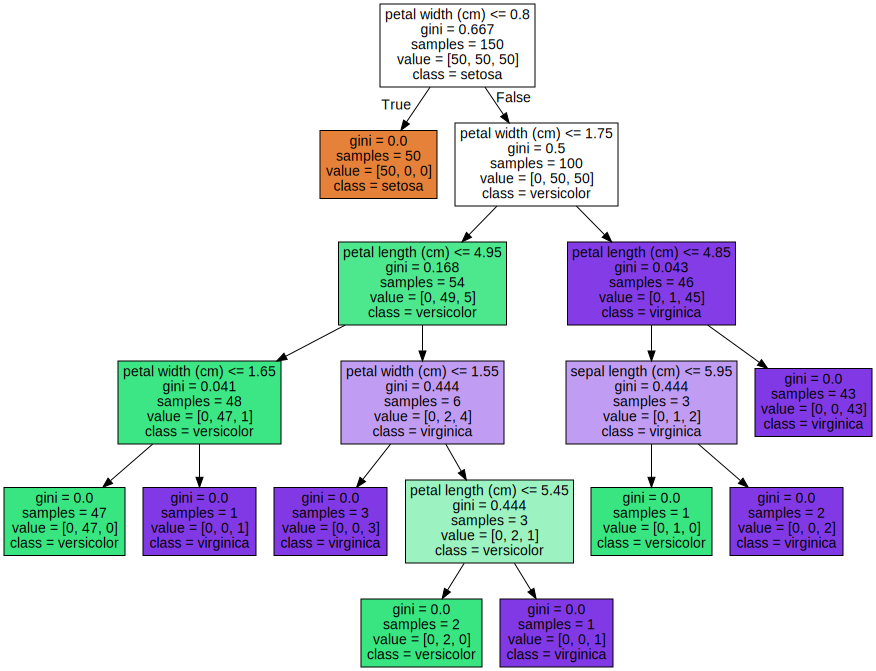

In [43]:
import graphviz
data = tree.export_graphviz(clf,out_file = None,
                          feature_names=iris.feature_names,
                          class_names = iris.target_names,
                          filled=True)
graph = graphviz.Source(data, format='png')
graph